In [114]:
%pip install --upgrade pip
%pip install numpy matplotlib
%pip freeze > ../requirements.txt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Regression Model and Cost

<figure>
 <img src="./images/model_and_cost.png"  style="width:600px;height:300px;">
</figure>


In [63]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([1.0, 2.2, 3.0, 4.5])
y_train = np.array([300.0, 500.0, 700.0, 900.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [1.  2.2 3.  4.5]
y_train = [300. 500. 700. 900.]


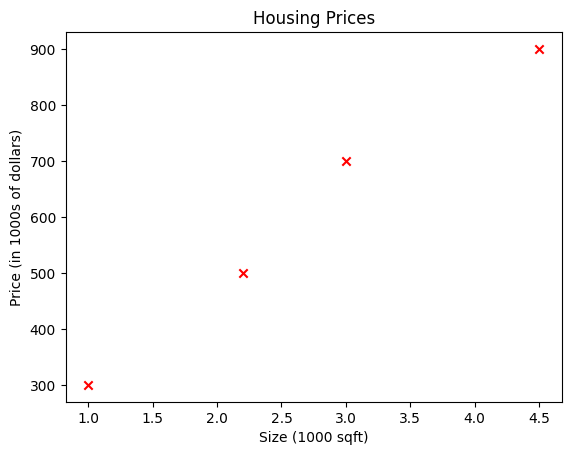

In [64]:
# Plot the data points
plt.scatter(x_train, y_train, marker="x", c="r")
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")
# Set the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.show()

In [65]:
def linear_regression(x, y):
    # Calculate the mean of the size and price
    mean_size = sum(x) / len(x)
    mean_price = sum(y) / len(y)

    # Calculate the slope (w) and intercept (b)
    w = sum((x - mean_size) * (y - mean_price) for x, y in zip(x, y)) / sum(
        (x - mean_size) ** 2 for x in x
    )
    b = mean_price - w * mean_size

    return w, b

In [66]:
w, b = linear_regression(x_train, y_train)
print(f"Slope (w): {w}")
print(f"Intercept (b): {b}")

Slope (w): 174.71975260919984
Intercept (b): 132.62466177039045


In [67]:
def predict(w, b, x):
    return w * x + b


# Predict the price of a house with a size of 1500
size = 12.0
predicted_price = predict(w, b, size)
print(f"Predicted price for a house with size {size}: {predicted_price}")

Predicted price for a house with size 12.0: 2229.2616930807885


Model output: [307.34441438 517.00811751 656.7839196  918.86354851]


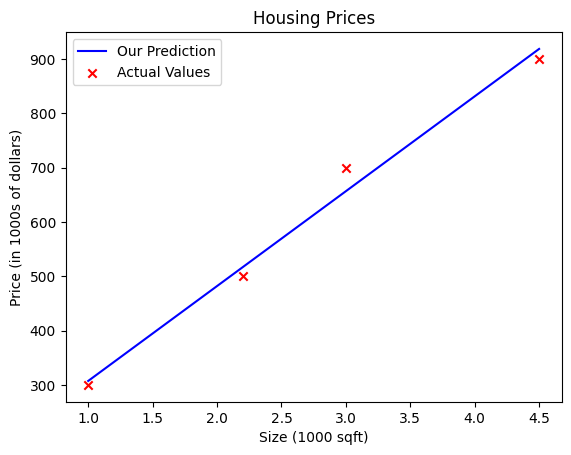

In [68]:
def compute_model_output(w, b, x):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = predict(w, b, x[i])

    return f_wb


# compute the model output
model_output = compute_model_output(w, b, x_train)
print(f"Model output: {model_output}")

# Plot our model prediction
plt.plot(x_train, model_output, c="b", label="Our Prediction")

# Plot the data points
plt.scatter(x_train, y_train, marker="x", c="r", label="Actual Values")

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel("Price (in 1000s of dollars)")
# Set the x-axis label
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()

In [112]:
def cost_function(x_train, y_train, w_array, b_array):
    j_wb = np.zeros(w_array.shape[0])
    for index, (w, b) in enumerate(zip(w_array, b_array)):
        ans = 0
        for i in range(len(x_train)):
            f_wb = predict(w, b, x_train[i])
            ans += (f_wb - y_train[i]) ** 2
        j_wb[index] = ans
    print(f"j_wb: {j_wb}")
    return sum(j_wb) / (2 * len(x_train))


weights = np.array([i for i in range(-4, 5)])
print(f"{weights=}")
biases = np.array([i for i in range(-4, 5)])
print(f"{biases=}")

j_wb = cost_function(x_train, y_train, weights, biases)

weights=array([-4, -3, -2, -1,  0,  1,  2,  3,  4])
biases=array([-4, -3, -2, -1,  0,  1,  2,  3,  4])
j_wb: [1720567.84 1700244.41 1680041.96 1659960.49 1640000.   1620160.49
 1600441.96 1580844.41 1561367.84]


<iframe src="https://www.desmos.com/calculator/uis29i0zdq?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>
